In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [249]:
df = pd.read_csv('NVDA.csv')
print("First few rows of the dataset:")
display(df.head())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Date,Adj Close,Close,High,Low,Open,Volume
0,28/11/2022,15.812541,15.827000,16.357000,15.725,16.025999,303741000
1,29/11/2022,15.624713,15.639000,15.932000,15.520,15.827000,298384000
2,30/11/2022,16.911863,16.923000,16.930000,15.597,15.697000,565298000
3,01/12/2022,17.123726,17.135000,17.264999,16.635,16.999001,470977000
4,02/12/2022,16.864895,16.875999,16.933001,16.445,16.659000,371389000


First few rows of the dataset:


C:\Users\R\AppData\Local\Temp\ipykernel_13660\128541.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-11-28,15.812541,15.827000,16.357000,15.725,16.025999,303741000
1,2022-11-29,15.624713,15.639000,15.932000,15.520,15.827000,298384000
2,2022-11-30,16.911863,16.923000,16.930000,15.597,15.697000,565298000
3,2022-12-01,17.123726,17.135000,17.264999,16.635,16.999001,470977000
4,2022-12-02,16.864895,16.875999,16.933001,16.445,16.659000,371389000


In [250]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Add derived features
# Calculate moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Calculate price momentum
df['Momentum_1d'] = df['Close'].pct_change(periods=1)
df['Momentum_5d'] = df['Close'].pct_change(periods=5)

# Calculate volatility (standard deviation over a window)
df['Volatility_5d'] = df['Close'].rolling(window=5).std()

# Calculate volume changes
df['Volume_Change'] = df['Volume'].pct_change()

# Calculate price direction (target variable - 1 if price goes up, 0 if it goes down)
df['Price_Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop rows with NaN values (due to rolling calculations)
df.dropna(inplace=True)


Missing values in each column:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [251]:
# Select features
features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'MA_5', 'MA_20', 'Momentum_1d', 'Momentum_5d',
            'Volatility_5d', 'Volume_Change']
X = df[features]
y = df['Price_Direction']

In [252]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# 4. Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Basic MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,),
                    activation='relu',
                    solver='adam',
                    alpha=0.001,
                    learning_rate_init=0.001,
                    max_iter=500,
                    random_state=42,
                    early_stopping=False,
                    validation_fraction=0.2,
                    )


# Train the model
mlp.fit(X_train_scaled, y_train)

In [ ]:
def explanation():
    """
hidden_layer_sizes=(50,)
Defines the number of neurons in each hidden layer.
(50,) → 1 hidden layer with 50 neurons.

activation='relu'
Activation function used in the hidden layers.
"relu" (Rectified Linear Unit) is the default:
Helps avoid the vanishing gradient problem.
Faster than "tanh" or "logistic"

solver='adam'
Optimization algorithm used to update weights.
"adam" (Adaptive Moment Estimation) is the default:
Efficient for large datasets.
Uses momentum and adaptive learning rates.
Alternatives:
"sgd" → Stochastic Gradient Descent (good for online learning but requires careful tuning).
"lbfgs" → Better for small datasets but slower.

alpha=0.001
L2 regularization strength (prevents overfitting).
Adds a penalty to large weights.
Higher values (e.g., 0.01) increase regularization → simpler model.
Lower values (e.g., 0.0001) reduce regularization → risk of overfitting.

learning_rate_init=0.001
Initial step size for weight updates.
Affects how fast the model learns.
Lower values (e.g., 0.0001) slow down training but increase stability.
Higher values (e.g., 0.01) speed up training but may cause instability.

max_iter=500
Maximum number of iterations (epochs) before stopping.
Each iteration represents one full pass through the dataset.
Increase (e.g., 1000) if the model hasn’t converged.

early_stopping=False
If True, stops training early if validation loss stops improving.
Since it's False, the model will always train for max_iter=500 epochs.

validation_fraction=0.2
If early_stopping=True, 20% of the training data is used for validation.
If early_stopping=False, this parameter is ignored.
"""
    pass


Model Accuracy: 0.6082

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17        42
           1       0.59      1.00      0.74        55

    accuracy                           0.61        97
   macro avg       0.80      0.55      0.46        97
weighted avg       0.77      0.61      0.50        97



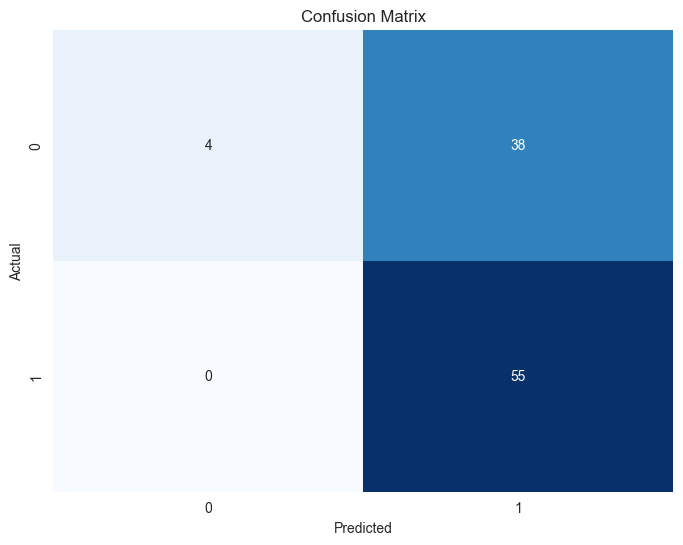

In [267]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [256]:
# Final Model with Best Parameters

print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred))


Final Model Accuracy: 0.6082474226804123

Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17        42
           1       0.59      1.00      0.74        55

    accuracy                           0.61        97
   macro avg       0.80      0.55      0.46        97
weighted avg       0.77      0.61      0.50        97



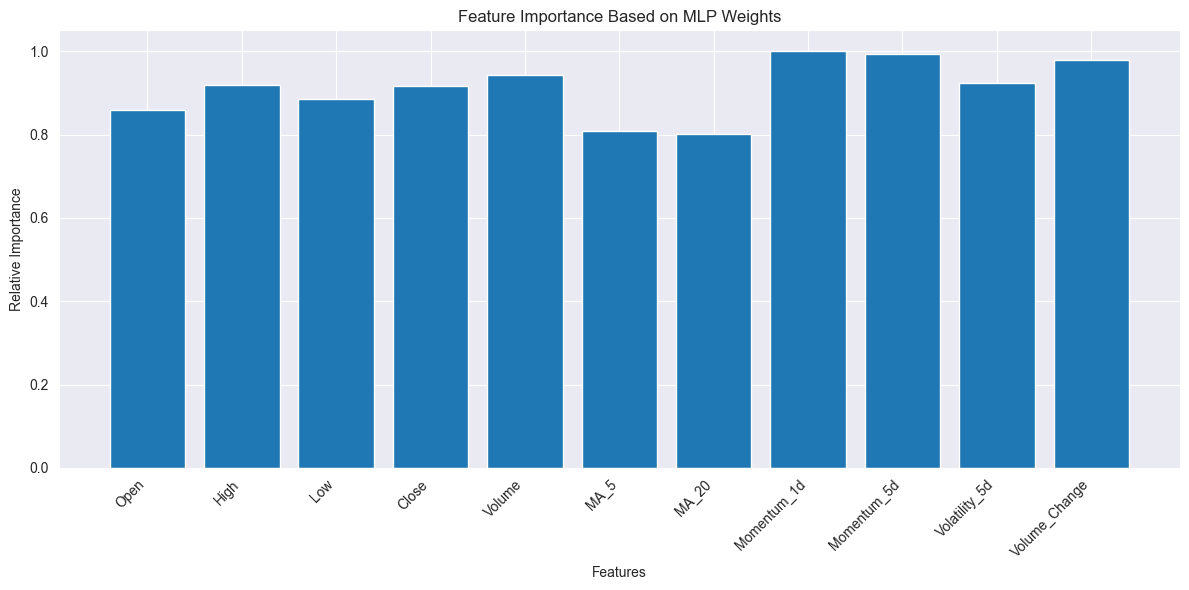

In [257]:
# Feature Importance Analysis
plt.figure(figsize=(12, 6))
coefs = np.abs(mlp.coefs_[0])
feature_importance = np.sum(coefs, axis=1)
feature_importance = feature_importance / np.max(feature_importance)

# Plot feature importance
plt.bar(features, feature_importance)
plt.title('Feature Importance Based on MLP Weights')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

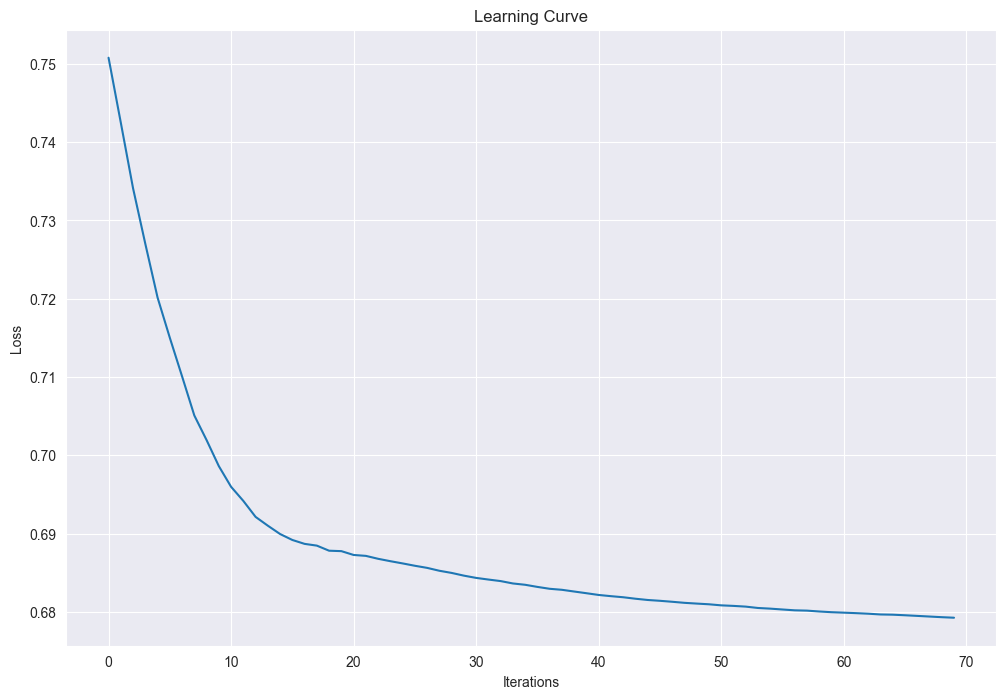

In [258]:
# Visualize Learning Curve
plt.figure(figsize=(12, 8))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

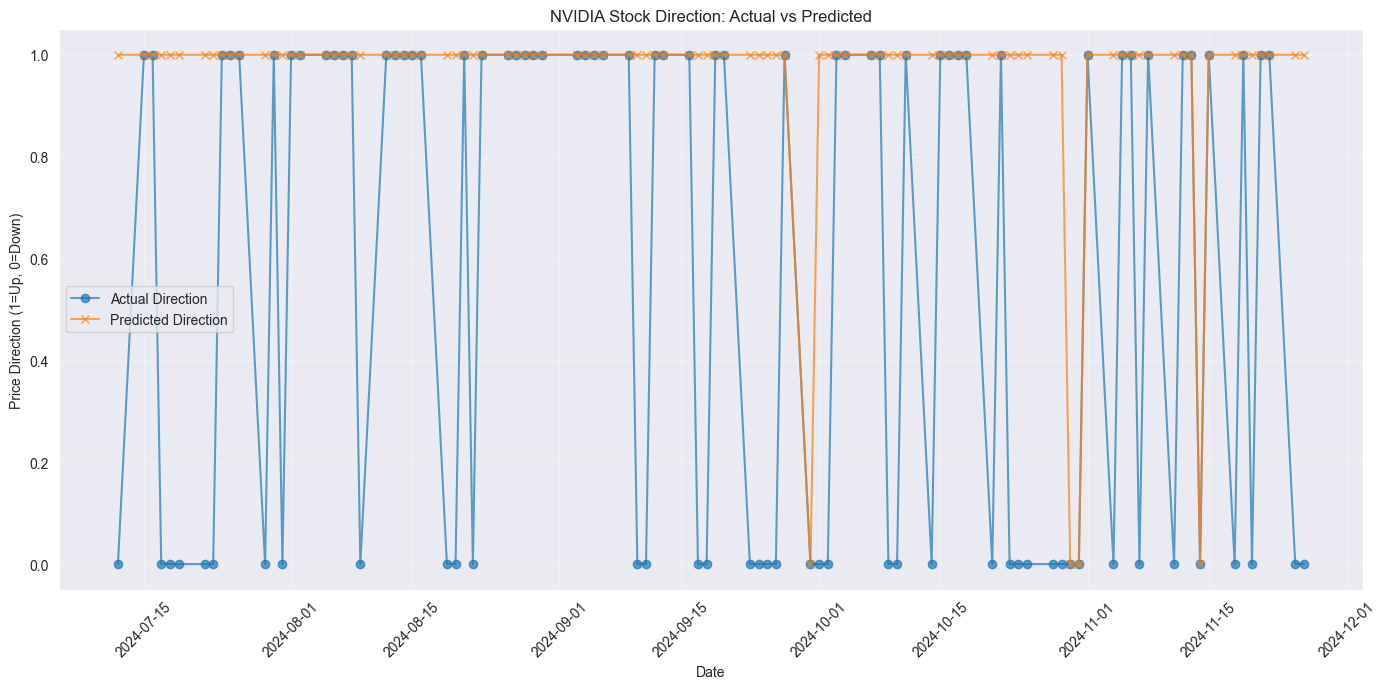

In [259]:
# Create a DataFrame with test data time indices and predictions
test_dates = df.iloc[len(X_train):].reset_index()['Date']
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test.values,
    'Predicted': y_pred
})

plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Direction', marker='o', alpha=0.7)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted Direction', marker='x', alpha=0.7)
plt.title('NVIDIA Stock Direction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price Direction (1=Up, 0=Down)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()